In [12]:
# !pip install statsmodels

In [41]:
import pandas as pd
import os
import numpy as np
# We are replacing scipy.stats.pearsonr with statsmodels for multiple regression
import statsmodels.api as sm 
import warnings
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# import seaborn as sns

### Linear Regression

In [57]:
# Suppress warnings, including the FutureWarning from pandas/numpy when creating data
warnings.simplefilter(action='ignore', category=FutureWarning)

def run_multiple_regression_analysis(Y, X):

    X.fillna(0, inplace=True)
    # Add a constant (the intercept term) to the independent variables matrix
    X = sm.add_constant(X)
    
    # Create and fit the OLS (Ordinary Least Squares) model
    model = sm.OLS(Y, X)
    results = model.fit()

    # print(f"Multiple Linear Regression Results for Dependent Variable: '{dependent_variable}'")
    # print(f"Independent Variables: {independent_variables}")
    
    # Display the full summary report
    print("\nFull Regression Summary (R-squared shows overall fit/correlation):")
    print(results.summary().as_text())

    print("\n" + "="*50)

    # 3. Calculate the full Correlation Matrix (still useful for initial inspection)
    # This matrix shows the simple bivariate correlation (r-value) for every pair of variables.
    # print("Bivariate Correlation Matrix (All Variables):")
    # correlation_matrix = df.corr(method='pearson')
    # print(correlation_matrix.to_markdown(floatfmt=".4f"))

    print("\n" + "="*50)

    variable_coef_list = [(name, value) for name, value in results.params.items()]
    return variable_coef_list

In [2]:
directory_path = 'D:/kuliah smt 7/kapsel/ets/train'
# directory_path = 'D:\\kuliah smt 7\\kapsel\\ets\\train'

all_items = os.listdir(directory_path)
all_items

['city_indexes.csv',
 'city_search_index.csv',
 'land_transactions.csv',
 'land_transactions_nearby_sectors.csv',
 'new_house_transactions.csv',
 'new_house_transactions_nearby_sectors.csv',
 'pre_owned_house_transactions.csv',
 'pre_owned_house_transactions_nearby_sectors.csv',
 'sector_POI.csv']

In [5]:
# file_path = 'D:/kuliah smt 7/kapsel/ets/train/city_indexes.csv'
file_path = os.path.join(directory_path, all_items[-1])
# print(file_path)
# print(directory_path)

try:
    dfSector = pd.read_csv(file_path)
    print("CSV data loaded successfully into a pandas DataFrame.")
    # print(df.head()) # Display the first 5 rows to confirm
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Check the path.")
except Exception as e:
    print(f"An error occurred: {e}")

# dfSector.head()
# dfSector['sector'].unique()

CSV data loaded successfully into a pandas DataFrame.


### Land

In [7]:
# file_path = 'D:/kuliah smt 7/kapsel/ets/train/city_indexes.csv'
file_path = os.path.join(directory_path, all_items[2])
# print(file_path)
# print(directory_path)

try:
    dfLand = pd.read_csv(file_path)
    print("CSV data loaded successfully into a pandas DataFrame.")
    # print(df.head()) # Display the first 5 rows to confirm
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Check the path.")
except Exception as e:
    print(f"An error occurred: {e}")

dfLand.head()

CSV data loaded successfully into a pandas DataFrame.


,month,sector,num_land_transactions,construction_area,planned_building_area,transaction_amount
0,2019-Apr,sector 59,2,72312.00,211124.00,452593.0
1,2019-Apr,sector 92,2,50992.48,152977.44,192200.0
2,2019-Apr,sector 86,1,12460.00,56706.00,196571.0
3,2019-Apr,sector 55,1,45404.90,136214.70,122600.0
4,2019-Apr,sector 25,1,28801.00,86403.00,139067.0


In [8]:
# 1. Group the DataFrame by 'sector'
dfLand_bySector = dfLand.groupby('sector').sum().reset_index()
dfLand_bySector.head()

,sector,month,num_land_transactions,construction_area,planned_building_area,transaction_amount
0,sector 1,2019-Apr2019-Aug2019-Dec2019-Feb2019-Jan2019-J...,3,80546.84,251209.44,953306.0
1,sector 10,2019-Apr2019-Aug2019-Dec2019-Feb2019-Jan2019-J...,2,81710.00,228828.00,528536.0
2,sector 11,2019-Apr2019-Aug2019-Dec2019-Feb2019-Jan2019-J...,0,0.00,0.00,0.0
3,sector 12,2019-Apr2019-Aug2019-Dec2019-Feb2019-Jan2019-J...,0,0.00,0.00,0.0
4,sector 13,2019-Apr2019-Aug2019-Dec2019-Feb2019-Jan2019-J...,0,0.00,0.00,0.0


In [16]:
pivot_column = 'sector'
df_land_sector = pd.merge(dfLand_bySector, dfSector, on=pivot_column, how='inner')
# df_land_sector.head()

In [19]:
# selected_column_series = df_land_sector.iloc[:, 6:-1]
# selected_column_series

In [84]:
# if __name__ == "__main__":
# coef_list = run_multiple_regression_analysis(df_land_sector['transaction_amount'], df_land_sector.iloc[:, 6:-1])

In [48]:
# coef_list

In [92]:
df_coefs = pd.DataFrame(coef_list, columns=['Variable', 'Coefficient'])

# Sort the DataFrame by the absolute value of the Coefficient in descending order
# We use .iloc[1:] to exclude the 'const' (intercept) for ranking importance
df_coefs_sorted = df_coefs.iloc[1:].copy()
df_coefs_sorted['Absolute_Coefficient'] = df_coefs_sorted['Coefficient'].abs()
# Sort by the absolute magnitude and drop the temporary absolute column
df_coefs_sorted = df_coefs_sorted.sort_values(by='Absolute_Coefficient', ascending=False)
df_coef_10Most = df_coefs_sorted[:10]
df_coef_10Most = df_coef_10Most.sort_values(by='Absolute_Coefficient', ascending=True).drop(columns=['Absolute_Coefficient'])
df_coef_10Most

,Variable,Coefficient
93,skincare_cosmetics_stores_dense,-1.087455e+11
95,service_stores_dense,1.216848e+11
74,residential_area_dense,1.447179e+11
127,medical_health_specialty_hospital_dense,1.762142e+11
88,rentable_shops_dense,-1.870391e+11
131,medical_health_pharmaceutical_healthcare_dense,-2.024104e+11
140,education_training_school_education_kindergart...,-2.434001e+11
115,transportation_facilities_service_bus_station_...,-2.624793e+11
75,office_building_dense,-2.731544e+11
86,bus_station_cnt_dense,4.088182e+11


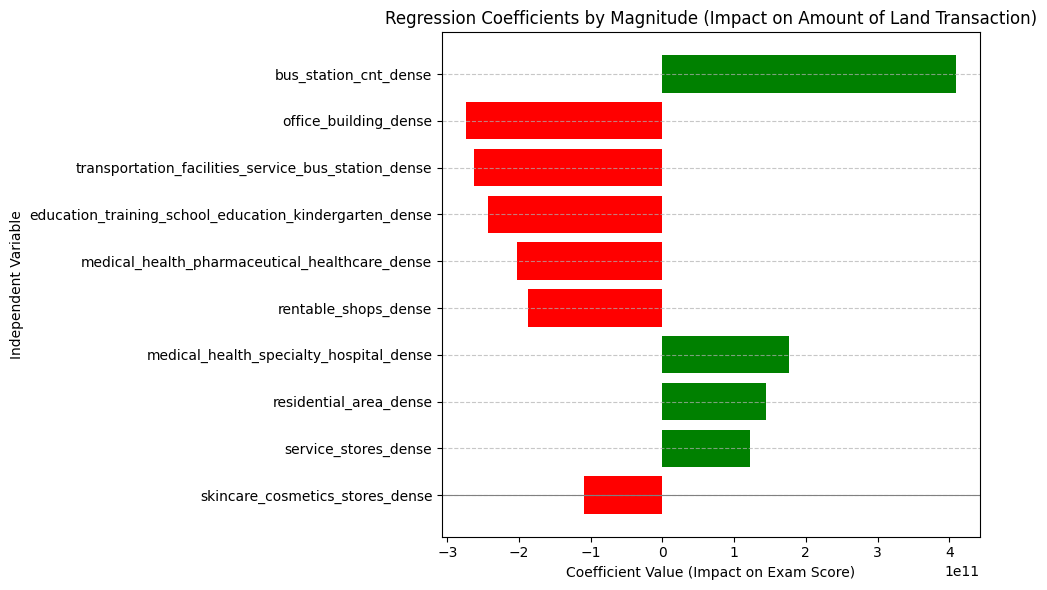

In [96]:
# --- PLOT THE SORTED COEFFICIENTS ---
# Create colors based on the sign of the coefficient (positive = green, negative = red)
colors = ['g' if c > 0 else 'r' for c in df_coef_10Most['Coefficient']]

plt.figure(figsize=(10, 6))
plt.barh(df_coef_10Most['Variable'], df_coef_10Most['Coefficient'], color=colors)
plt.axhline(0, color='grey', linewidth=0.8) # Add a line at y=0 for reference
plt.title('Regression Coefficients by Magnitude (Impact on Amount of Land Transaction)')
plt.xlabel('Coefficient Value (Impact on Exam Score)')
plt.ylabel('Independent Variable')
# plt.xticks(rotation=45, ha='right') # Rotate variable names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# plt.show()
plt.savefig('D:/kuliah smt 7/kapsel/ets/correlation_land_sector.png')

### New House

In [49]:
# file_path = 'D:/kuliah smt 7/kapsel/ets/train/city_indexes.csv'
file_path = os.path.join(directory_path, all_items[4])
# print(file_path)
# print(directory_path)

try:
    dfNewHouse = pd.read_csv(file_path)
    print("CSV data loaded successfully into a pandas DataFrame.")
    # print(df.head()) # Display the first 5 rows to confirm
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Check the path.")
except Exception as e:
    print(f"An error occurred: {e}")

# dfNewHouse.head()

CSV data loaded successfully into a pandas DataFrame.


In [51]:
# 1. Group the DataFrame by 'sector'
dfNewHouse_bySector = dfNewHouse.groupby('sector').sum().reset_index()
# dfNewHouse_bySector.head()

In [71]:
pivot_column = 'sector'
dfNewHouse_sector = pd.merge(dfNewHouse_bySector, dfSector, on=pivot_column, how='inner')
# dfNewHouse_sector.head()

In [19]:
# selected_column_series = df_land_sector.iloc[:, 6:-1]
# selected_column_series

In [73]:
# if __name__ == "__main__":
coef_list_newHouse = run_multiple_regression_analysis(dfNewHouse_bySector['amount_new_house_transactions'], dfNewHouse_bySector.iloc[:, 12:13])


Full Regression Summary (R-squared shows overall fit/correlation):
                                  OLS Regression Results                                 
Dep. Variable:     amount_new_house_transactions   R-squared:                       0.000
Model:                                       OLS   Adj. R-squared:                  0.000
Method:                            Least Squares   F-statistic:                       nan
Date:                           Tue, 14 Oct 2025   Prob (F-statistic):                nan
Time:                                   20:53:41   Log-Likelihood:                -1513.4
No. Observations:                             95   AIC:                             3029.
Df Residuals:                                 94   BIC:                             3031.
Df Model:                                      0                                         
Covariance Type:                       nonrobust                                         
                 coef    std err

In [56]:
coef_list_newHouse

[('const', 2515547.673684211)]

In [44]:
df_coefs = pd.DataFrame(coef_list_newHouse, columns=['Variable', 'Coefficient'])

# Sort the DataFrame by the absolute value of the Coefficient in descending order
# We use .iloc[1:] to exclude the 'const' (intercept) for ranking importance
df_coefs_sorted = df_coefs.iloc[1:].copy()
df_coefs_sorted['Absolute_Coefficient'] = df_coefs_sorted['Coefficient'].abs()
# Sort by the absolute magnitude and drop the temporary absolute column
df_coefs_sorted = df_coefs_sorted.sort_values(by='Absolute_Coefficient', ascending=False).drop(columns=['Absolute_Coefficient'])
df_coef_10Most = df_coefs_sorted[:10]

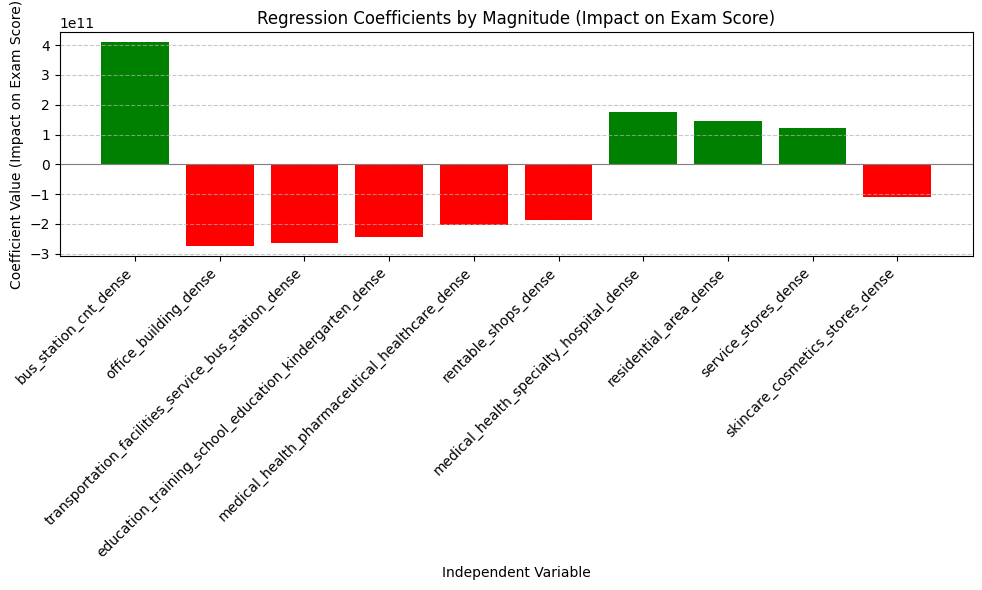

In [45]:
# --- PLOT THE SORTED COEFFICIENTS ---
# Create colors based on the sign of the coefficient (positive = green, negative = red)
colors = ['g' if c > 0 else 'r' for c in df_coefs_sorted['Coefficient']]

plt.figure(figsize=(10, 6))
plt.bar(df_coef_10Most['Variable'], df_coef_10Most['Coefficient'], color=colors)
plt.axhline(0, color='grey', linewidth=0.8) # Add a line at y=0 for reference
plt.title('Regression Coefficients by Magnitude (Impact on Exam Score)')
plt.ylabel('Coefficient Value (Impact on Exam Score)')
plt.xlabel('Independent Variable')
plt.xticks(rotation=45, ha='right') # Rotate variable names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Pre Owned

In [65]:
# file_path = 'D:/kuliah smt 7/kapsel/ets/train/city_indexes.csv'
file_path = os.path.join(directory_path, all_items[6])
# print(file_path)
# print(directory_path)

try:
    dfPreOwned = pd.read_csv(file_path)
    print("CSV data loaded successfully into a pandas DataFrame.")
    # print(df.head()) # Display the first 5 rows to confirm
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Check the path.")
except Exception as e:
    print(f"An error occurred: {e}")

# dfPreOwned.head()

CSV data loaded successfully into a pandas DataFrame.


In [66]:
# 1. Group the DataFrame by 'sector'
dfPreOwned_bySector = dfPreOwned.groupby('sector').sum().reset_index()
# dfNewHouse_bySector.head()

In [75]:
pivot_column = 'sector'
dfPreOwned_sector = pd.merge(dfPreOwned_bySector, dfSector, on=pivot_column, how='inner')
dfPreOwned_sector.columns

Index(['sector', 'month', 'area_pre_owned_house_transactions',
       'amount_pre_owned_house_transactions',
       'num_pre_owned_house_transactions',
       'price_pre_owned_house_transactions', 'sector_coverage',
       'population_scale', 'residential_area', 'office_building',
       ...
       'medical_health_rehabilitation_institution_dense',
       'medical_health_first_aid_center_dense',
       'medical_health_blood_donation_station_dense',
       'medical_health_disease_prevention_institution_dense',
       'medical_health_general_hospital_dense', 'medical_health_clinic_dense',
       'education_training_school_education_middle_school_dense',
       'education_training_school_education_primary_school_dense',
       'education_training_school_education_kindergarten_dense',
       'education_training_school_education_research_institution_dense'],
      dtype='object', length=147)

In [19]:
# selected_column_series = df_land_sector.iloc[:, 6:-1]
# selected_column_series

In [76]:
# if __name__ == "__main__":
coef_list_PreOwned = run_multiple_regression_analysis(dfPreOwned_sector['price_pre_owned_house_transactions'], dfPreOwned_sector.iloc[:, 6:-1])


Full Regression Summary (R-squared shows overall fit/correlation):
                                    OLS Regression Results                                    
Dep. Variable:     price_pre_owned_house_transactions   R-squared:                       1.000
Model:                                            OLS   Adj. R-squared:                   -inf
Method:                                 Least Squares   F-statistic:                       nan
Date:                                Tue, 14 Oct 2025   Prob (F-statistic):                nan
Time:                                        20:54:22   Log-Likelihood:                -500.31
No. Observations:                                  77   AIC:                             1155.
Df Residuals:                                       0   BIC:                             1335.
Df Model:                                          76                                         
Covariance Type:                            nonrobust                        

D:\newAnaconda\envs\jupyterKu\Lib\site-packages\statsmodels\regression\linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
D:\newAnaconda\envs\jupyterKu\Lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
D:\newAnaconda\envs\jupyterKu\Lib\site-packages\statsmodels\base\model.py:1527: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale


In [77]:
coef_list_PreOwned

[('const', 1591480.1268931748),
 ('sector_coverage', 1070192.7905479325),
 ('population_scale', -61.629051221355795),
 ('residential_area', -20994.6202355308),
 ('office_building', 14885.485160068705),
 ('commercial_area', -275409.70433732803),
 ('resident_population', 75.54421733942934),
 ('office_population', 3.0101029008613347),
 ('number_of_shops', -1201.467680805939),
 ('catering', 304.77817033707885),
 ('retail', 1788.2821559554282),
 ('hotel', -2947.319884881787),
 ('transportation_station', -4656.2010409984905),
 ('education', -3118.993435043577),
 ('leisure_and_entertainment', 3688.1154825164936),
 ('bus_station_cnt', 23598.7290485622),
 ('subway_station_cnt', 444012.97696048906),
 ('rentable_shops', 31579.27954326008),
 ('surrounding_housing_average_price', -28.6264857164442),
 ('surrounding_shop_average_rent', -1711.074365084312),
 ('leisure_entertainment_entertainment_venue_game_arcade',
  -167354.98670966533),
 ('leisure_entertainment_entertainment_venue_party_house', 9791

In [90]:
df_coefs_PreOwned = pd.DataFrame(coef_list_PreOwned, columns=['Variable', 'Coefficient'])

# Sort the DataFrame by the absolute value of the Coefficient in descending order
# We use .iloc[1:] to exclude the 'const' (intercept) for ranking importance
df_coefs_PreOwned_sorted = df_coefs_PreOwned.iloc[1:].copy()
df_coefs_PreOwned_sorted['Absolute_Coefficient'] = df_coefs_PreOwned_sorted['Coefficient'].abs()
# Sort by the absolute magnitude and drop the temporary absolute column
df_coefs_PreOwned_sorted = df_coefs_PreOwned_sorted.sort_values(by='Absolute_Coefficient', ascending=False)
df_coefs_PreOwned_sorted_10Most = df_coefs_PreOwned_sorted[:10]
df_coefs_PreOwned_sorted_10Most = df_coefs_PreOwned_sorted_10Most.sort_values(by='Absolute_Coefficient', ascending=True).drop(columns=['Absolute_Coefficient'])
df_coefs_PreOwned_sorted_10Most

,Variable,Coefficient
85,leisure_and_entertainment_dense,1.074595e+10
86,bus_station_cnt_dense,1.117631e+10
140,education_training_school_education_kindergart...,-1.288844e+10
131,medical_health_pharmaceutical_healthcare_dense,1.367964e+10
88,rentable_shops_dense,1.638128e+10
126,medical_health_dense,1.746081e+10
99,catering_food_stores_dense,1.891325e+10
115,transportation_facilities_service_bus_station_...,2.052776e+10
83,transportation_station_dense,-2.702655e+10
75,office_building_dense,3.760246e+10


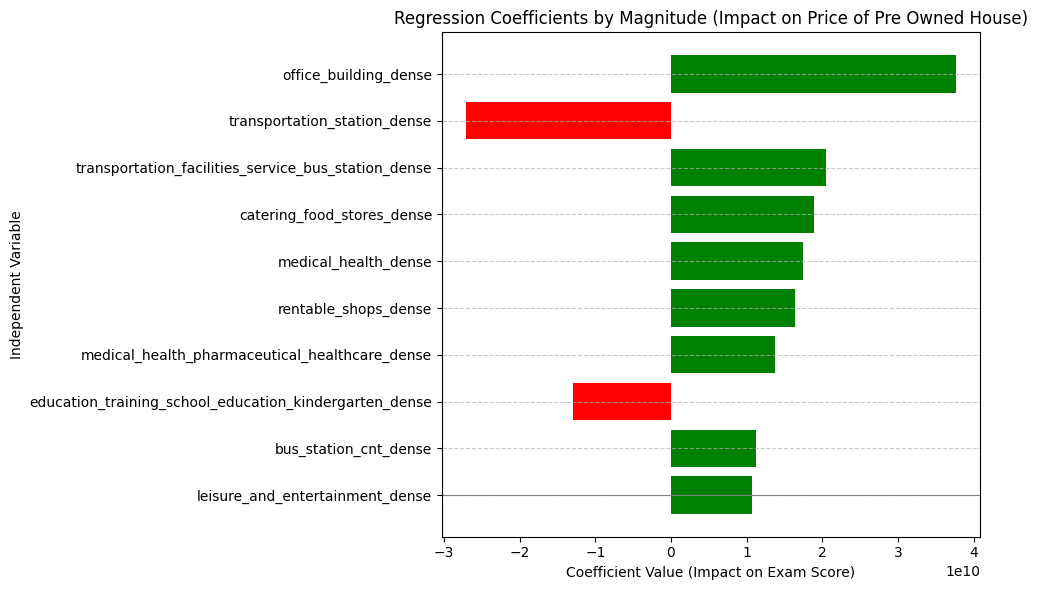

In [91]:
# --- PLOT THE SORTED COEFFICIENTS ---
# Create colors based on the sign of the coefficient (positive = green, negative = red)
colors = ['g' if c > 0 else 'r' for c in df_coefs_PreOwned_sorted_10Most['Coefficient']]

plt.figure(figsize=(10, 6))
plt.barh(df_coefs_PreOwned_sorted_10Most['Variable'], df_coefs_PreOwned_sorted_10Most['Coefficient'], color=colors)
plt.axhline(0, color='grey', linewidth=0.8) # Add a line at y=0 for reference
plt.title('Regression Coefficients by Magnitude (Impact on Price of Pre Owned House)')
plt.xlabel('Coefficient Value (Impact on Exam Score)')
plt.ylabel('Independent Variable')
# plt.xticks(rotation=45, ha='right') # Rotate variable names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# plt.show()
plt.savefig('D:/kuliah smt 7/kapsel/ets/correlation_preOwned_sector.png')